<div style="text-align: center;">
    <h1>
        <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance" target="_blank">Medical Cost Personal Datasets</a>
    </h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


# Imports

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import tensorflow as tf;

# Loading Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Cleaning

In [5]:
original_columns = df.columns

In [6]:
df['smoker'] = pd.get_dummies(df['smoker'], drop_first=True, dtype= np.int8)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [8]:
dummies = pd.get_dummies(df[['region', 'sex']], drop_first=True, dtype= np.int8, prefix= ['region', ''])

df_temp = pd.concat([df, dummies], axis= 1).copy()
df_temp = df_temp.drop(columns= ['region', 'sex'])

In [9]:
df_temp.head()

,age,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,_male
0,19,27.900,0,1,16884.92400,0,0,1,0
1,18,33.770,1,0,1725.55230,0,1,0,1
2,28,33.000,3,0,4449.46200,0,1,0,1
3,33,22.705,0,0,21984.47061,1,0,0,1
4,32,28.880,0,0,3866.85520,1,0,0,1


# Exploratory Data Analysis

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='sex', ylabel='Count'>

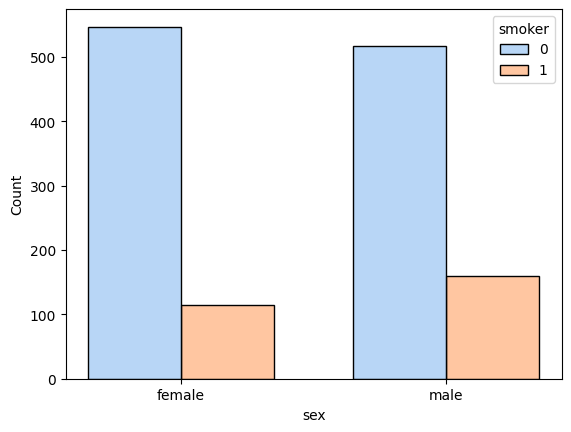

In [11]:
sns.histplot(data= df, x= 'sex', hue= 'smoker', multiple= 'dodge', palette= 'pastel', shrink= 0.7)

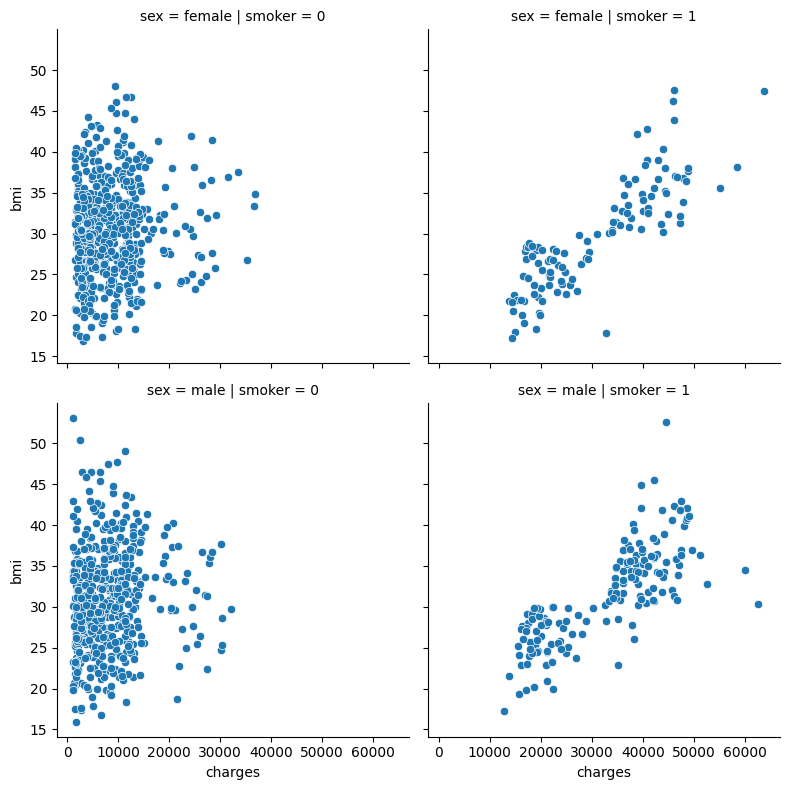

In [12]:
g= sns.FacetGrid(data= df, row = 'sex', col= 'smoker', height=4)
g.map_dataframe(sns.scatterplot, x= 'charges', y= 'bmi')

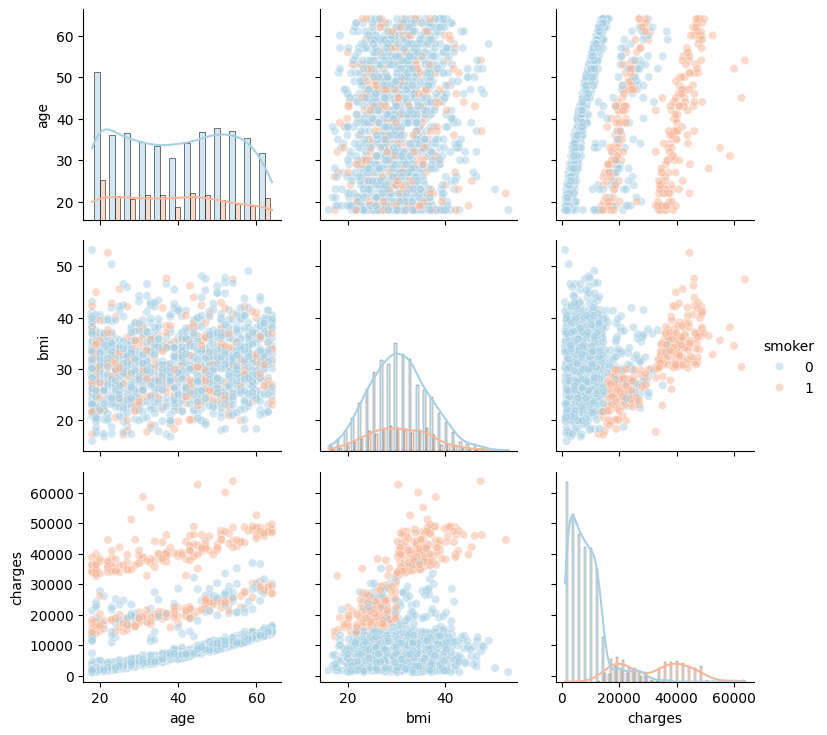

In [13]:
p = sns.PairGrid(data= df, vars= ['age', 'bmi', 'charges'], hue='smoker', palette= 'RdBu_r')
p.map_diag(sns.histplot, multiple= 'dodge', shrink= 0.7, kde=True)
p.map_offdiag(sns.scatterplot, alpha= 0.5)
p.add_legend()

<Axes: xlabel='children', ylabel='charges'>

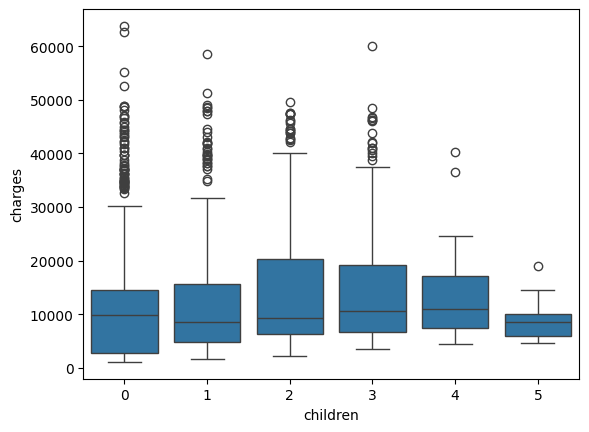

In [14]:
sns.boxplot(data= df, x= 'children', y= 'charges')

Text(0.5, 1.0, 'Minimum Charges by Region and Children')

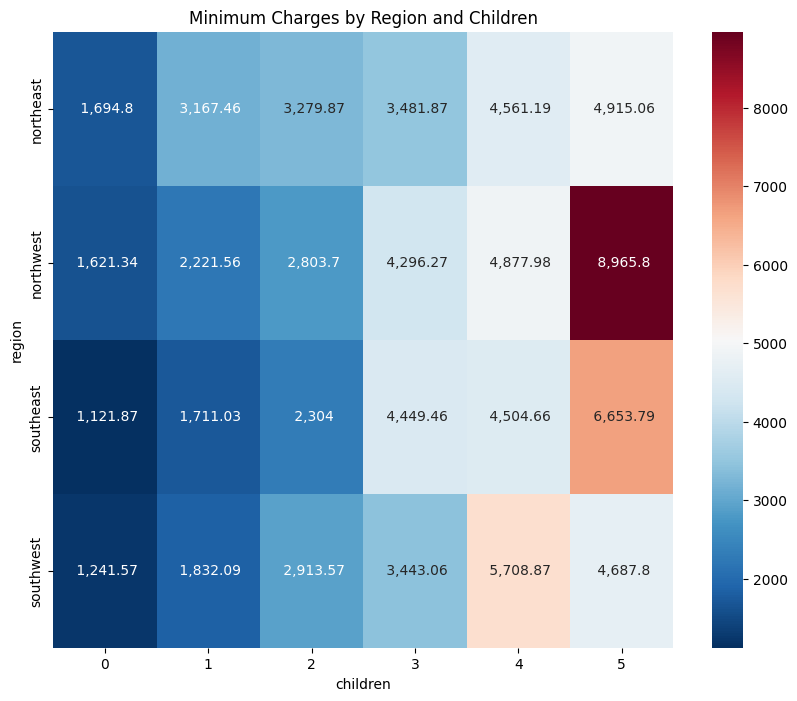

In [15]:
pv = df.pivot_table(values= 'charges', index= 'region', columns= 'children', aggfunc= 'min')
plt.figure(figsize= (10, 8))
sns.heatmap(data= pv, annot= True, cmap= 'RdBu_r', fmt=' ,g')
plt.title('Minimum Charges by Region and Children')

# Modeling

In [16]:
df_temp.head()

,age,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,_male
0,19,27.900,0,1,16884.92400,0,0,1,0
1,18,33.770,1,0,1725.55230,0,1,0,1
2,28,33.000,3,0,4449.46200,0,1,0,1
3,33,22.705,0,0,21984.47061,1,0,0,1
4,32,28.880,0,0,3866.85520,1,0,0,1


In [17]:
X = df_temp.drop(columns= ['charges'])
y = df_temp['charges']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [20]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [22]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
y_scaler= MinMaxScaler()
y_scaler.fit(y_train.values.reshape(-1, 1))
y_train=y_scaler.transform(y_train.values.reshape(-1, 1))

In [24]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(shape= [X_train.shape[1]]))
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
#model.add(tf.keras.layers.Dense(64, activation= 'relu'))
#model.add(tf.keras.layers.Dense(64, activation= 'relu'))
#model.add(tf.keras.layers.Dense(64, activation= 'relu'))
#model.add(tf.keras.layers.Dense(64, activation= 'relu'))
#model.add(tf.keras.layers.Dense(64, activation= 'relu'))
#model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation= 'linear'))

model.compile(loss= tf.keras.losses.huber,
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001),
              metrics = [tf.keras.metrics.mse,
                         tf.keras.metrics.mae])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
callback_ = EarlyStopping(monitor= 'loss', patience= 10, min_delta=0.0001, restore_best_weights= True)
model.fit(X_train, y_train, epochs= 500, callbacks= [callback_], validation_split= 0.2)

Epoch 1/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.2168 - mean_squared_error: 0.0900 - val_loss: 0.0308 - val_mean_absolute_error: 0.1947 - val_mean_squared_error: 0.0617
Epoch 2/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0248 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0497 - val_loss: 0.0209 - val_mean_absolute_error: 0.1602 - val_mean_squared_error: 0.0418
Epoch 3/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.1420 - mean_squared_error: 0.0380 - val_loss: 0.0152 - val_mean_absolute_error: 0.1369 - val_mean_squared_error: 0.0305
Epoch 4/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.1211 - mean_squared_error: 0.0281 - val_loss: 0.0118 - val_mean_absolute_error: 0.1207 - val_mean_squared_error: 0.0236
Epoch 5/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.1052 - mean_squared_error: 0.0217 - val_loss: 0.0097 - val_mean_

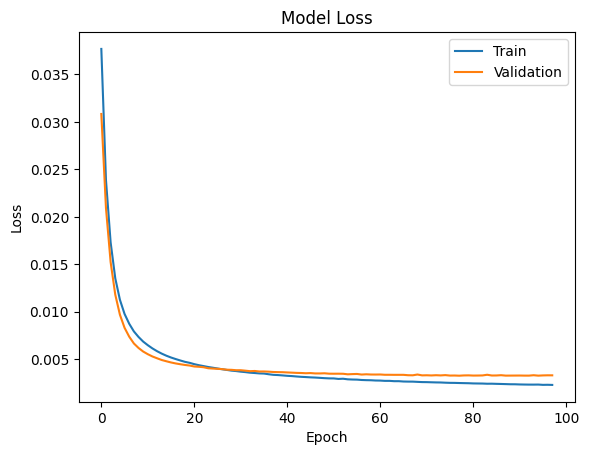

In [28]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [29]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [30]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred = tf.squeeze(y_pred)

In [31]:
np.sqrt(tf.keras.metrics.mse(y_test, y_pred))

np.float32(5133.907)

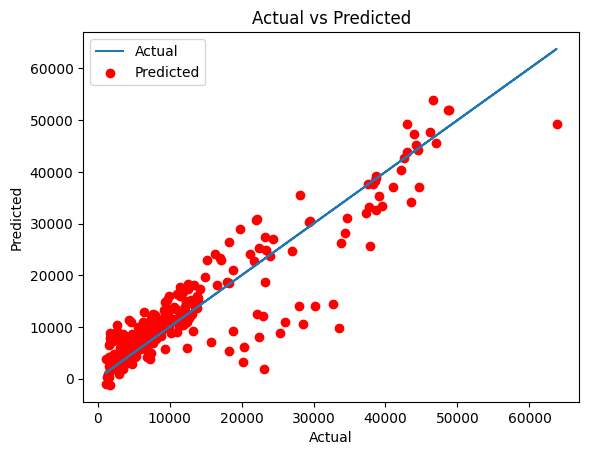

In [32]:
plt.plot(y_test, y_test, label= 'Actual')
plt.scatter(y_test, y_pred, label= 'Predicted', color= 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()